In [22]:
import pandas as pd
import os
import math
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
all_movies_df = pd.read_csv('all_movies.csv')
all_movies_df = all_movies_df.dropna(subset=['MovieBoxOffice', 'MoviePlot']).reset_index(drop=True)
all_movies_df

In [ ]:
adapted_movies_df = pd.read_csv('adapted_movies.csv')
adapted_movies_df = adapted_movies_df.dropna(subset=['MovieBoxOffice', 'MoviePlot']).reset_index(drop=True)
adapted_movies_df

### sentiment extraction

### output : (take technique with best R^2 value)
- plot data visu with param : feature to plot
- plot coefs bar with intervals with param : genre (or overall)
- overall comparison between overall between all_movies and adapted_movies of coefs with param: technique
- correlation coefficient between book plot and movie plot (pearson and non-linear one)


In [29]:
def sentiment_analysis(pipeline, df):  
    box_office = df.MovieBoxOffice
    sentiments = pd.DataFrame(pipeline(df.MoviePlot).tolist())
    return pd.concat([box_office, sentiments], axis=1)


In [ ]:
def sentiment_analysis(pipeline, df):  
    box_office = df.MovieBoxOffice
    sentiments = pd.DataFrame(pipeline(df.MoviePlot).tolist())
    return pd.concat([box_office, sentiments], axis=1)

##### vader

In [30]:
def vader_sentiment_analysis(texts):
    analyzer = SentimentIntensityAnalyzer()
    sentiments = texts.apply(lambda t: analyzer.polarity_scores(t))
    return sentiments

##### transformers

In [ ]:
def BERT_sentiment_analysis(texts):
    sentiments = texts.apply()
    return sentiments

##### spacy

In [ ]:
def spacy_sentiment_analysis(texts):
    sentiments = texts.apply()
    return sentiments

##### empath

In [ ]:
def empath_sentiment_analysis(texts):
    sentiments = texts.apply()
    return sentiments

### linear regression

In [79]:
data = sentiment_analysis(vader_sentiment_analysis, adapted_movies_df)
data['compound_aug'] = data.compound.apply(lambda x: x**2)
data['box_office_log'] = data.MovieBoxOffice.apply(lambda x: math.log(x))

In [77]:
# NOTE: find way to do feature augmentation better ! 

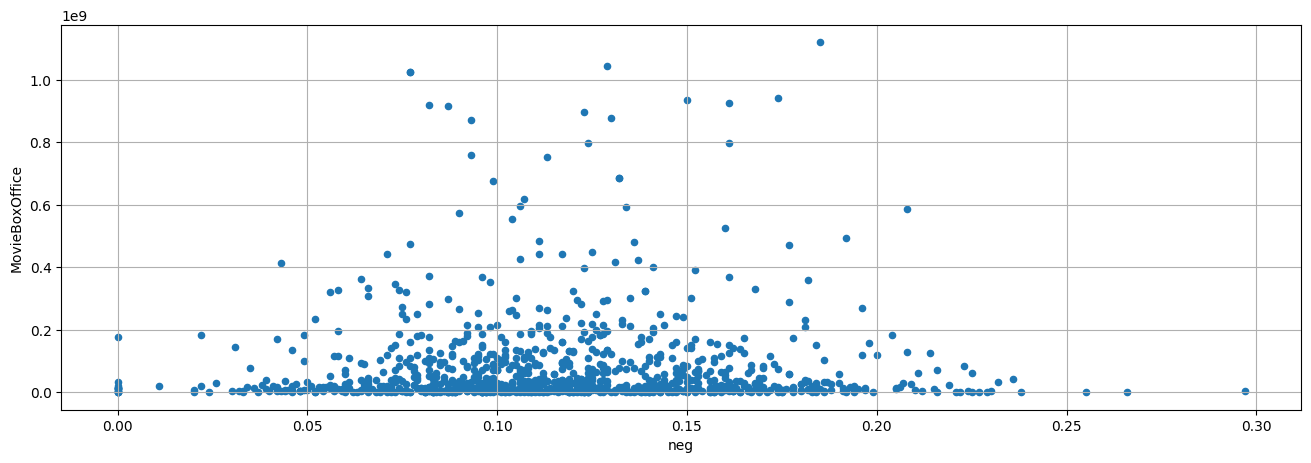

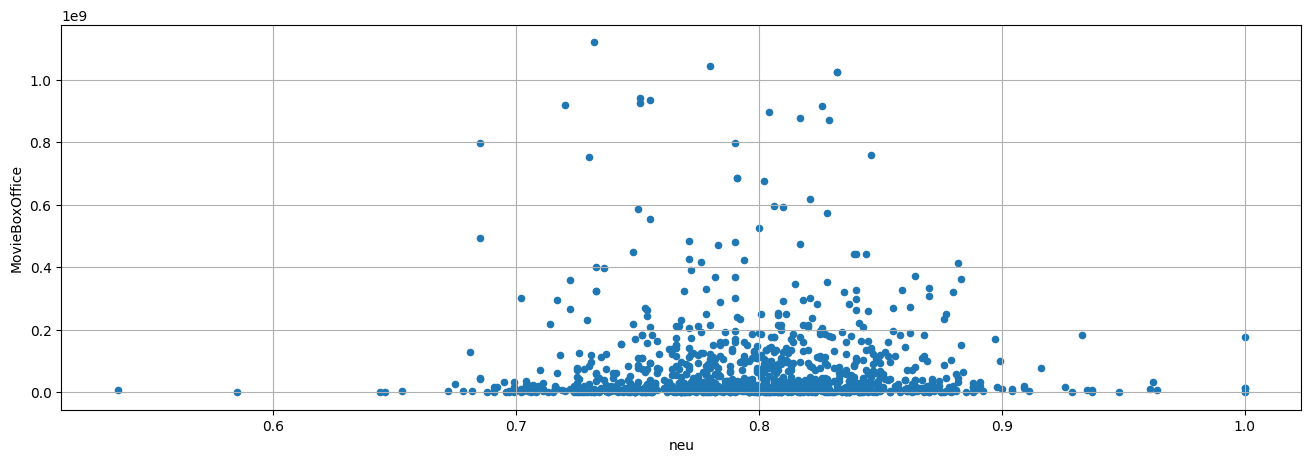

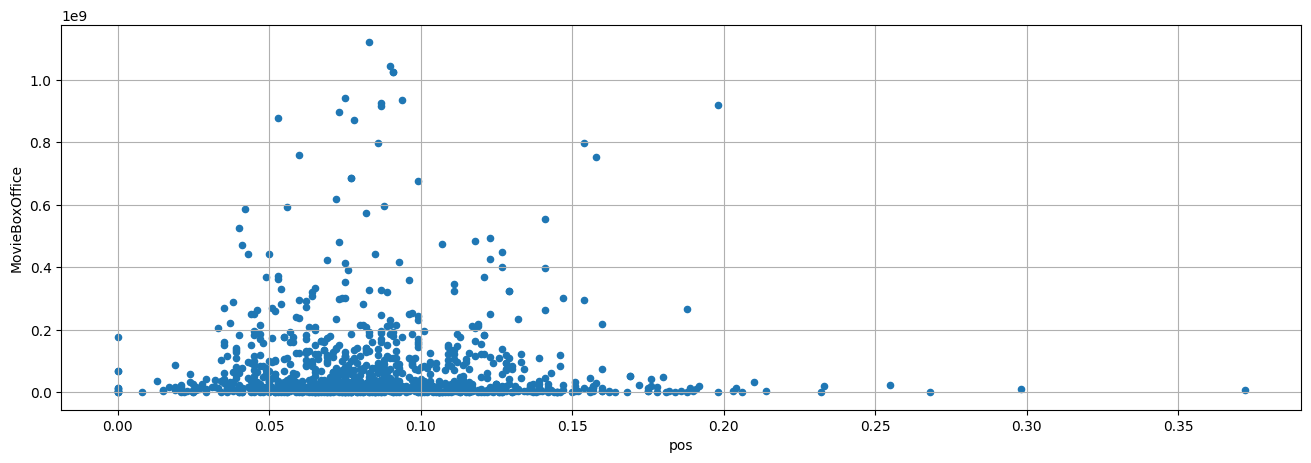

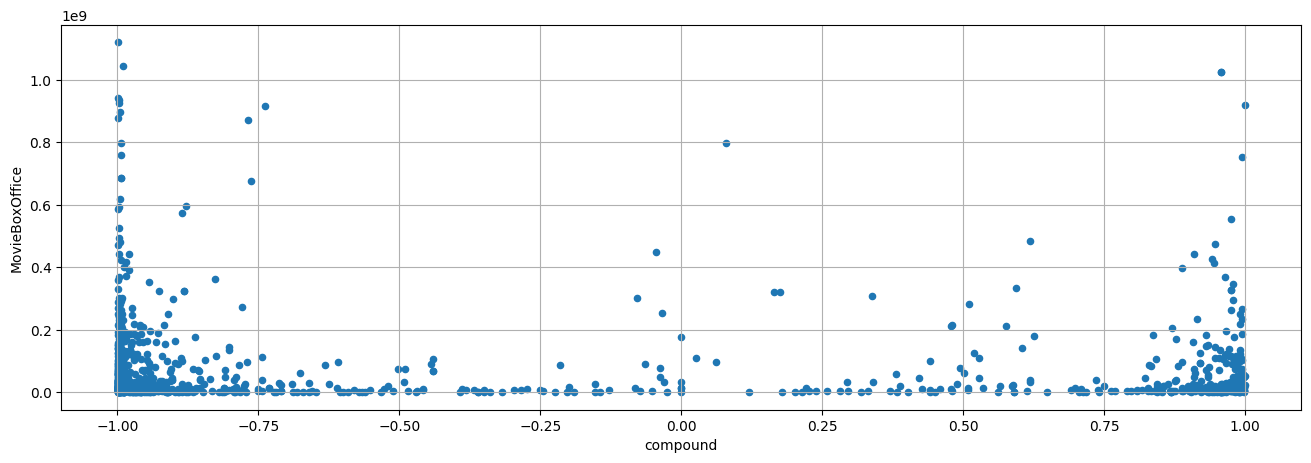

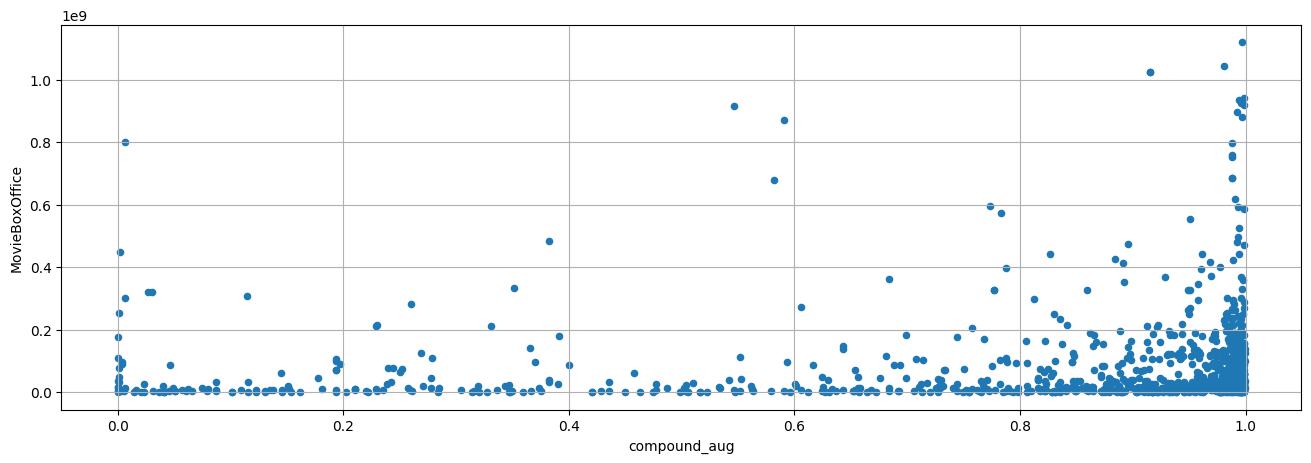

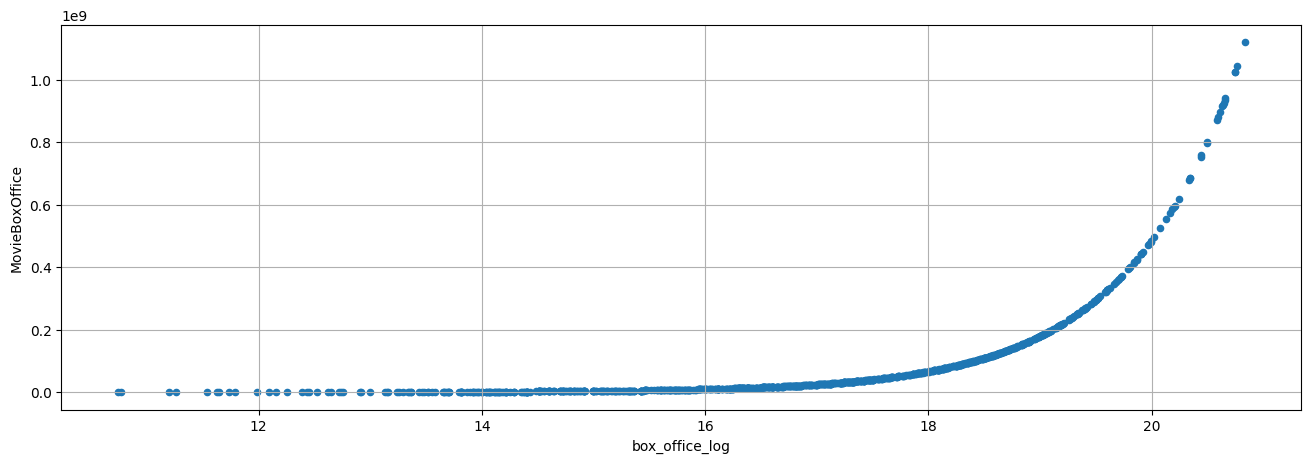

In [80]:
# plot box-office to sentiment
def exploratory_plot(data, y):
    for column in data.columns:
        if column == y:
            continue
        data.plot(kind='scatter', x=column, y=y, figsize=(16, 5), grid=True)
        plt.show()
    return

In [ ]:
exploratory_plot(data, 'MovieBoxOffice')

In [ ]:
def train_linear_regression(data):

    target = 'MovieBoxOffice'
    features = data.drop(columns = [target]).columns.tolist() 
    formula = f"{target} ~ {' + '.join(features)}"

    model = smf.ols(formula=formula, data=data)
    np.random.seed(2)
    results = model.fit()
    print(results.summary())

    return results


In [ ]:
data = sentiment_analysis(vader_sentiment_analysis, adapted_movies_df)
results = train_linear_regression(data)
# plot coefs of each sentiment for a genre
print(results.summary())


In [31]:
data = sentiment_analysis(vader_sentiment_analysis, adapted_movies_df)
data

,MovieBoxOffice,neg,neu,pos,compound
0,50000000.0,0.091,0.813,0.096,0.9099
1,900000.0,0.108,0.804,0.087,-0.1531
2,274827.0,0.140,0.800,0.060,-0.9992
3,2000000.0,0.102,0.796,0.102,0.5619
4,575000.0,0.062,0.770,0.168,0.9557
...,...,...,...,...,...
997,6171057.0,0.175,0.779,0.046,-0.9870
998,4593914.0,0.180,0.784,0.036,-0.9501
999,15780280.0,0.144,0.805,0.051,-0.9764
1000,16175929.0,0.107,0.872,0.021,-0.9717
